In [7]:
import os
import nltk

from nltk.probability import FreqDist

In [8]:
trn_en = os.path.join("europarl_raw","train.en")
trn_de = os.path.join("europarl_raw","train.de")

In [9]:
# q2.1
def num_tokens(file_path):
    with open(file_path, "r") as f:
        file_tokens = f.read().split()
    print("file name:", file_path)
    print("num total tokens:", len(file_tokens))
    print("num total types/vocab size:", len(set(file_tokens)))

In [10]:
num_tokens(trn_en)
num_tokens(trn_de)

file name: europarl_raw/train.en
num total tokens: 124031
num total types/vocab size: 8326
file name: europarl_raw/train.de
num total tokens: 112572
num total types/vocab size: 12504


In [11]:
# q2.2
def vocab_size(file_path):
    with open(file_path, "r") as f:
        file_tokens = f.read().split()
    num_unk = 0
    tot_vocab = set(file_tokens)
    freq_dist = FreqDist(file_tokens)
    for i in freq_dist:
        if freq_dist[i] == 1:
            num_unk += 1
    print("# tokens replaced by <UNK>:", num_unk)
    print("final vocab size:", len(tot_vocab)-num_unk+1)

In [12]:
vocab_size(trn_en)
vocab_size(trn_de)

# tokens replaced by <UNK>: 3909
final vocab size: 4418
# tokens replaced by <UNK>: 7460
final vocab size: 5045


In [13]:
# q2.3
def unk_words(file_path):
    with open(file_path, "r") as f:
        file_tokens = f.read().split()
    num_unk = 0
    tot_vocab = set(file_tokens)
    freq_dist = FreqDist(file_tokens)
    unks = []
    for i in freq_dist:
        if freq_dist[i] == 1:
            unks.append(i)
    return set(unks)

In [14]:
unk_words(trn_en)

{'9.15',
 'unhappy',
 'considering',
 'enthusiastically',
 'regrettably',
 'confused',
 'aquatic',
 'subcommittee',
 'sober',
 'vaunted',
 'approximation',
 'arabia',
 'peas',
 'panacea',
 'vacant',
 'baringdorf',
 'contain',
 'incident',
 'orlando',
 '8.52',
 'contributors',
 'humiliated',
 'liquidation',
 'modify',
 'fas',
 'methodology',
 'senyszyn',
 'suleiman',
 'devastated',
 'rack',
 'verhofstadt',
 'bos',
 'affair',
 'diagnosis',
 'concluding',
 'severe',
 'reinforces',
 'entrepreneurs',
 'dissatisfied',
 'iranians',
 'ensue',
 'edge',
 'cancun',
 'lankan',
 'cradle',
 'suspending',
 '1981',
 'padua',
 'adding',
 'sharing',
 'imported',
 'dumped',
 '1970s',
 'perpetuate',
 'salaries',
 'eggs',
 'eastward',
 '7.05',
 'overtaken',
 'buşoi',
 'uninformed',
 'envoys',
 'realised',
 'dairy',
 'expulsion',
 'overlook',
 'brazen',
 'lesser',
 'links',
 'funny',
 'examination',
 'journalism',
 'grouped',
 'universities',
 'dissolution',
 '73',
 'isolating',
 'abu',
 'processed',
 'equa

In [9]:
# q2.4
def num_shared_vocab(en_f, de_f):
    with open(en_f, "r") as f:
        en_vocab = set(f.read().split())
        
    with open(de_f, "r") as f:
        de_vocab = set(f.read().split())

    num_share = 0
    for en in en_vocab:
        if en in de_vocab:
            num_share += 1
    print("num shared vocab:", num_share)

In [10]:
num_shared_vocab(trn_en,trn_de)

num shared vocab: 1460


##### Further stuff by Mo 

In [3]:
!pip install spacy 
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

     |████████████████████████████████| 13.7 MB 59 kB/s  eta 0:00:01    |█████████▌                      | 4.1 MB 3.6 MB/s eta 0:00:03     |████████████████████▉           | 8.9 MB 2.0 MB/s eta 0:00:03


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 19.3 MB 1.3 MB/s eta 0:00:01    |█████████▋                      | 5.8 MB 546 kB/s eta 0:00:25     |██████████                      | 6.0 MB 807 kB/s eta 0:00:17     |████████████████▍               | 9.9 MB 1.3 MB/s eta 0:00:08
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [61]:
pip install seaborn

     |████████████████████████████████| 285 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np
import spacy
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sn

ModuleNotFoundError: No module named 'seaborn'

In [35]:
def avg_sent_len(text):
    sqs = [len(sent.split()) for sent in text.split('\n')]
    return np.mean(sqs), np.std(sqs), np.median(sqs)

In [36]:
with open(trn_en) as f:
    en_txt = f.read()
with open(trn_de) as f:
    de_txt = f.read()
avg_sent_len(en_txt), avg_sent_len(de_txt)

((12.401859814018598, 4.481649698754208, 12.0),
 (11.256074392560745, 3.6217961852241856, 11.0))

the difference in length seen above stems from the fact that german is more morphologically rich language than english and while it is not agglutinative it uses inflectional morephology more commonly to combine words. 
This means that the decoder will have to generate multiple english words from one german word, which relies on the ability of the encoder to embedd the different components of the word in its hidden representation. **how would the encoder react to this issue keeping in mind that we are using a static embedding not a contextualized one?**

This is also reflected in the difference in tokens and types ratios between the 2 languages (see below), so while the 2 languages have almost the same number of tokens in the training set there is a considerable differnce in types number, meaning that the german encoder would have harder time learning the german embeddings since the vocabulary size is larger, the types are less common and appear in less contexes in comparision with thier english counter parts and the embedding layer have more parameters but is trained on almost the same dataset size as the english decoder.

In [37]:
print("tokens ratio de/en: ", 112572/124031)
print("types ratio de/en: ", 8326/12504)

tokens ratio de/en:  0.9076118067257379
types ratio de/en:  0.6658669225847729


In [47]:
def pos_tags_dict(text, model, unk_words):
    sents = text.split('\n')
    pos_tags_words = defaultdict(list)
    for sent in tqdm(sents):
        doc = model(sent)
        for t in doc:
            if t.orth_ in unk_words:
                pos_tags_words[t.pos_].append(t.orth_)
    for tag in pos_tags_words:
        pos_tags_words[tag] = list(set(pos_tags_words[tag]))
    return pos_tags_words

In [67]:
nlp_en = spacy.load("en_core_web_sm")
nlp_de = spacy.load("de_core_news_sm")
unks_en = unk_words(trn_en)
unks_de = unk_words(trn_de)
tags_en = pos_tags_dict(en_txt, nlp_en, unks_en)
tags_de = pos_tags_dict(de_txt, nlp_de, unks_de)
counts_en = {key:len(value) for key,value in tags_en.items()}
counts_de = {key:len(value) for key,value in tags_de.items()}

100%|██████████| 10001/10001 [00:58<00:00, 171.33it/s]


<BarContainer object of 15 artists>

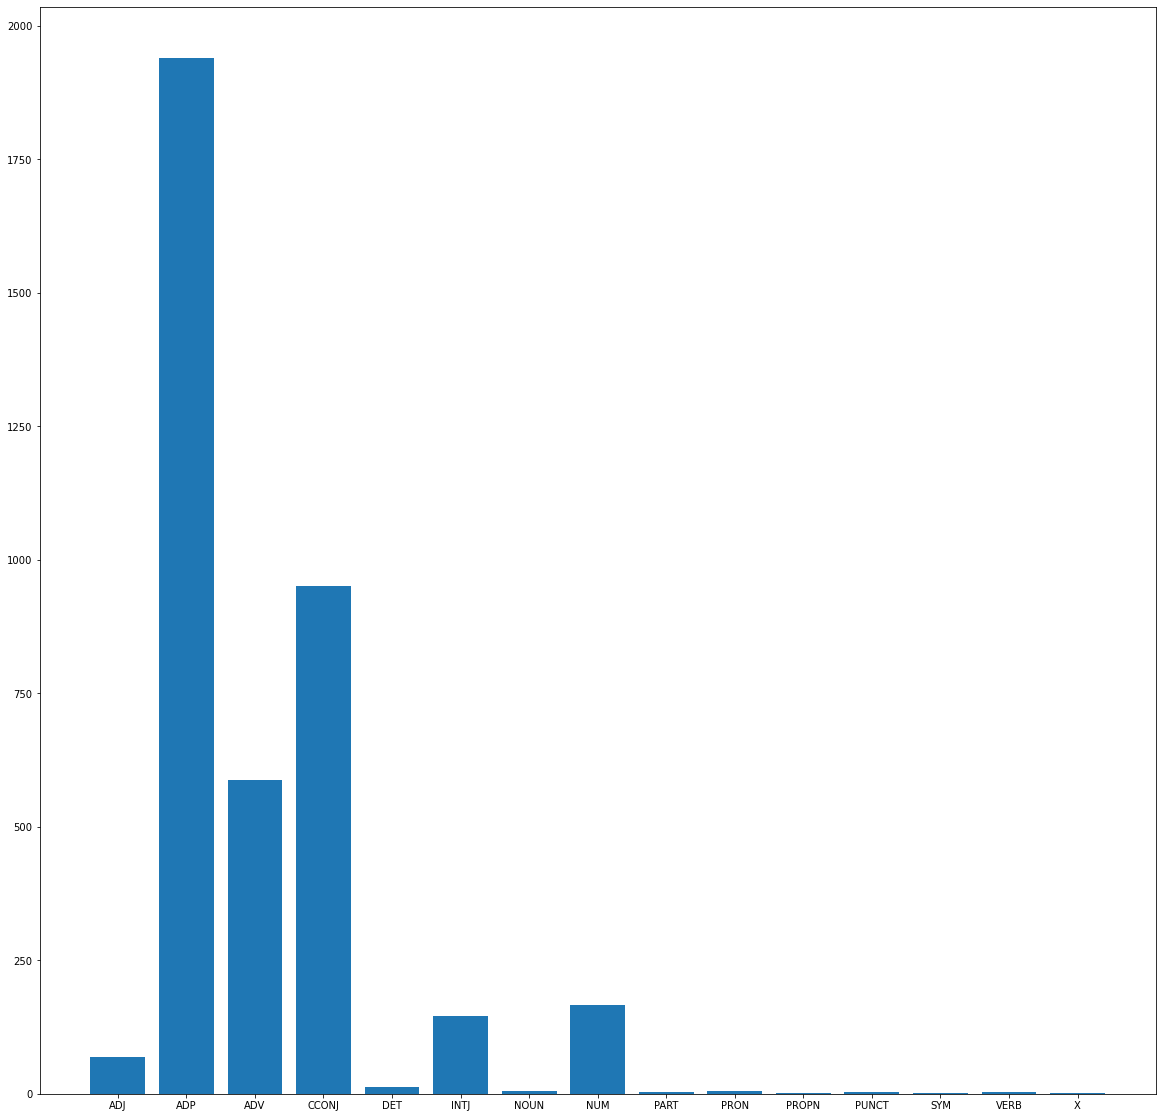

In [73]:
plt.figure(figsize=(20,20))
plt.bar(list(sorted(counts_en.keys())), counts_en.values())

<BarContainer object of 16 artists>

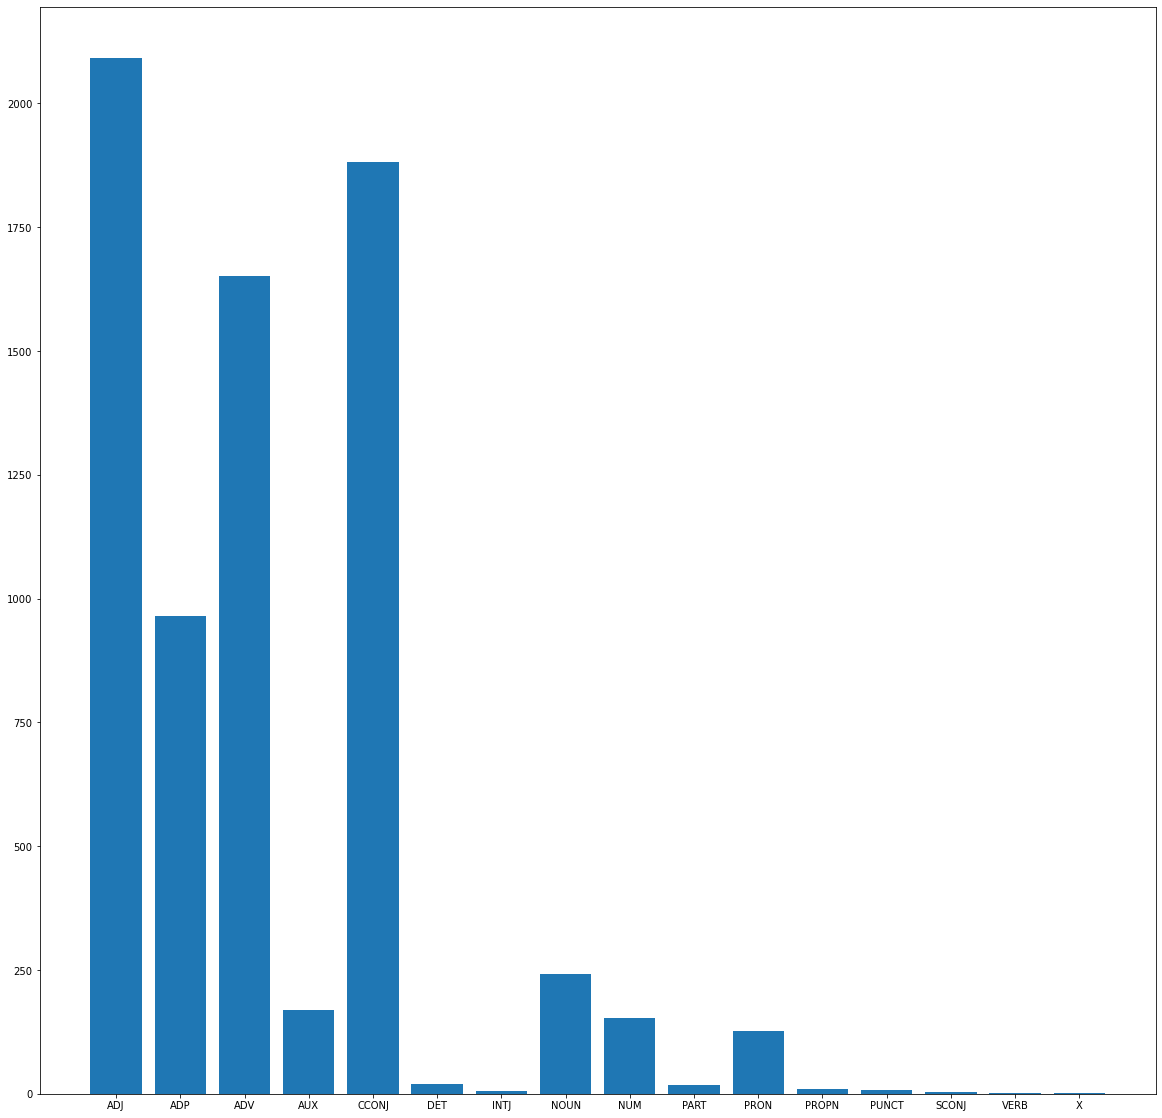

In [74]:
plt.figure(figsize=(20,20))
plt.bar(list(sorted(counts_de.keys())), counts_de.values())